# Loading the graph

In [205]:
import networkx as nx
import matplotlib.pyplot as plt

In [206]:
# iterate each line as an edge
data = "../../soln/10.txt"
parseNode = lambda x: tuple((int(y) for y in x.split(' ')))
G = nx.read_edgelist(data, create_using=nx.DiGraph(), nodetype=parseNode, delimiter=' -> ')

print(G.edges())
print(f"There are {len(G.nodes())} nodes and {len(G.edges())} edges")

[((1,), (1, 2, 3, 4)), ((1, 2, 3, 4), (1, 2, 3, 4, 7, 8)), ((2, 3, 4), (1, 2, 3, 4)), ((2, 3, 4), (2, 3, 4, 5)), ((2, 3, 4), (2, 3, 4, 6)), ((2, 3, 4, 5), (2, 3, 4, 5, 8)), ((2, 3, 4, 5), (2, 3, 4, 5, 6, 9)), ((2, 3, 4, 6), (2, 3, 4, 5, 6, 8)), ((2, 3, 4, 6), (2, 3, 4, 5, 6, 9)), ((1, 2, 3, 4, 7, 8), (1, 2, 3, 4, 5, 7, 8)), ((2, 3, 4, 5, 8), (1, 2, 3, 4, 5, 7, 8)), ((2, 3, 4, 5, 8), (2, 3, 4, 5, 6, 8))]
There are 10 nodes and 12 edges


## Visualize the data
with a custom layout

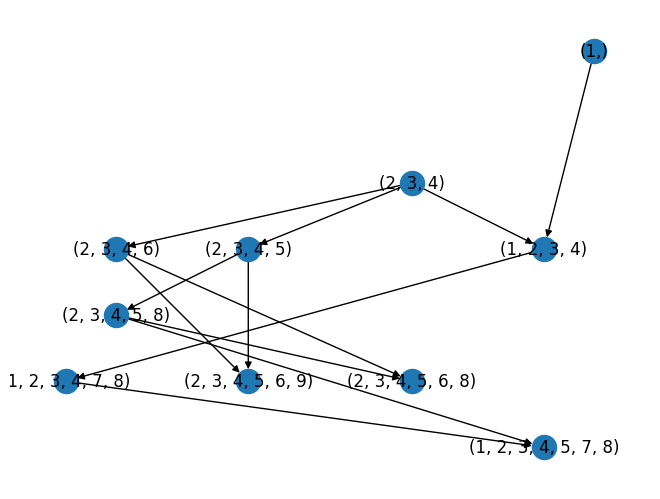

In [207]:
def height_layout(G):
    # start with a circular layout and adjust the y cords to the length of the node content
    pos = nx.circular_layout(G)
    pos = { node: [x, -len(node)] for node, (x, y) in pos.items() }
    return pos


# only draw the first few nodes
G_sub = G.subgraph(list(G.nodes())[:50])
nx.draw(G_sub, height_layout(G_sub), with_labels=True)
plt.show()

# Convergent Evolution

## Algorithm



In [208]:
def co_ev_features():
    common_features = set()

    # roots of the graph
    sources = [node for node, in_degree in G.in_degree() if in_degree == 0]

    for layer in nx.bfs_layers(G, sources):
        for i in range(len(layer)):
            for j in range(i + 1, len(layer)):
                
                node_i = layer[i]
                node_j = layer[j]
                overlap = tuple(set(node_i).intersection(set(node_j)))
                
                if len(overlap) > 0:
                    if overlap not in G.nodes():
                        common_features.add(overlap)
    
    return common_features


common_features = co_ev_features()
print(f"There are {len(common_features)} common, independently evolved features")
print(common_features)

There are 2 common, independently evolved features
{(8, 2, 3, 4), (2, 3, 4, 5, 6)}


In [209]:
example_feature = list(common_features)[0]

In [210]:
def find_feature(feature):
    nodes = set()
    frontier = {node for node, in_degree in G.in_degree() if in_degree == 0}
    
    while len(frontier) > 0:
        node = frontier.pop()
        
        if set(feature).issubset(set(node)):
            nodes.add(node)
        else:
            frontier.update(G.successors(node))
    
    return nodes


print(f"For example, feature {example_feature} evolved independently in {find_feature(example_feature)}")

For example, feature (8, 2, 3, 4) evolved independently in {(1, 2, 3, 4, 7, 8), (2, 3, 4, 5, 6, 8), (2, 3, 4, 5, 8)}


In [211]:
# Additional common features can be found by analyzing the "origin" of where the features developed

def feature_origin(feature):
    inherited = []
    remaining_features = set(feature)
    
    # find (hypothetical) ancestors of the feature
    for node in G.nodes():
        if set(node).issubset(set(feature)):
            # node subset of feature: valid parent edges
            overlap = set(node).intersection(set(feature))
            
            if len(overlap) > 0 and len(overlap) != len(feature):
                inherited.append(node)
                remaining_features -= overlap
    
    return {
        "inherited": inherited,
        "independent": list(remaining_features)
    }



origins = {feature: feature_origin(feature) for feature in common_features}
print(f"Computed origins for {len(origins)} features")
print(f"For example, the origin of feature {example_feature} is {origins[example_feature]}")

new_features = set()

for origin in origins.values():
    new_features.update(origin["independent"])

print()
print(f"Of the features, there are {len(new_features)} subsets which developed independently")
print(new_features)

Computed origins for 2 features
For example, the origin of feature (8, 2, 3, 4) is {'inherited': [(2, 3, 4)], 'independent': [8]}

Of the features, there are 1 subsets which developed independently
{8}
